<a href="https://colab.research.google.com/github/iobis/pyobis/blob/main/notebooks/MeasurementOrFact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MeasurementOrFacts Analysis

MeasurementOrFacts is a measurement of or fact about an rdfs:Resource [http://www.w3.org/2000/01/rdf-schema#Resource](http://www.w3.org/2000/01/rdf-schema#Resource). Resources can be thought of as identifiable records or instances of classes and may include, but need not be limited to dwc:Occurrence, dwc:Organism, dwc:MaterialSample, dwc:Event, dwc:Location, dwc:GeologicalContext, dwc:Identification, or dwc:Taxon.


For example, A MoF record can be the weight of an organism in grams. The number of placental scars. Surface water temperature in Celsius.

> Read more about classifying and studying MeasurementOrFacts [here](https://dwc.tdwg.org/terms/#measurementorfact).


We will use `pyobis` - python client for [OBIS (Ocean Biodiversity Information System)](https://obis.org) to fetch MoF records and analyse them.


## Installing `pyobis`

In [1]:
try:
  import pyobis
except:
  !pip install -q "git+https://github.com/iobis/pyobis.git"

### importing other modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from pyobis import occurrences
occ = occurrences

## Grabbing data

Let us grab some MoF data for a species say *Egregia menziesii* commonly known as Feather boa kelp. This is an algae of the lower intertidal to subtidal zones.

In [58]:
data = occ.search(scientificname="Egregia menziesii", mof=True, hasextensions="MeasurementOrFacts").execute()

2025-04-18 13:28:01 - pyobis.obisutils - INFO - 31379 to be fetched. Estimated time =0.553707257509231687 seconds
2025-04-18 13:28:01 - pyobis.obisutils - INFO - Fetching: [███████████████████████████████.....................................................................] 10000/31379
2025-04-18 13:28:21 - pyobis.obisutils - INFO - Fetching: [███████████████████████████████████████████████████████████████.....................................] 20000/31379
2025-04-18 13:28:30 - pyobis.obisutils - INFO - Fetching: [███████████████████████████████████████████████████████████████████████████████████████████████.....] 30000/31379
2025-04-18 13:28:38 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 31379/31379
2025-04-18 13:28:39 - pyobis.obisutils - INFO - Fetched 31379 records.


In [59]:
data

,basisOfRecord,class,classid,collectionCode,coordinateUncertaintyInMeters,date_end,date_mid,date_start,date_year,decimalLatitude,...,dateIdentified,measurementID,measurementType,measurementUnit,measurementValue,occurrenceID_y,level,measurementMethod,measurementTypeID,measurementUnitID
0,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.189037e+12,1.189037e+12,1.189037e+12,2007.0,35.472387,...,NaN,KEEN-TS-PISCO_subtidal-213182-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-213182,0,NaN,NaN,NaN
1,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.281571e+12,1.281571e+12,1.281571e+12,2010.0,36.445343,...,NaN,KEEN-TS-PISCO_subtidal-675592-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-675592,0,NaN,NaN,NaN
2,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.279498e+12,1.279498e+12,1.279498e+12,2010.0,34.402950,...,NaN,KEEN-TS-PISCO_subtidal-252234-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-252234,0,NaN,NaN,NaN
3,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.121990e+12,1.121990e+12,1.121990e+12,2005.0,33.988533,...,NaN,KEEN-TS-PISCO_subtidal-599841-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-599841,0,NaN,NaN,NaN
4,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.375229e+12,1.373933e+12,1.372637e+12,2013.0,34.467400,...,NaN,KEEN-TS-sbc_lter_longterm_community-2031-indiv...,Individual Density,number per sq metre,0,KEEN-TS-sbc_lter_longterm_community-2031,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.247702e+12,1.247702e+12,1.247702e+12,2009.0,34.051483,...,NaN,KEEN-TS-PISCO_subtidal-514938-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-514938,0,NaN,NaN,NaN
33837,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.284768e+12,1.284768e+12,1.284768e+12,2010.0,38.715570,...,NaN,KEEN-TS-PISCO_subtidal-186636-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-186636,0,NaN,NaN,NaN
33838,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.343088e+12,1.343088e+12,1.343088e+12,2012.0,34.015867,...,NaN,KEEN-TS-PISCO_subtidal-620784-indivudual-density,Individual Density,number per sq metre,0,KEEN-TS-PISCO_subtidal-620784,0,NaN,NaN,NaN
33839,HumanObservation,Phaeophyceae,830,NCEAS-KEEN-TS,500.0,1.343693e+12,1.342397e+12,1.341101e+12,2012.0,34.467400,...,NaN,KEEN-TS-sbc_lter_longterm_community-1676-indiv...,Individual Density,number per sq metre,0,KEEN-TS-sbc_lter_longterm_community-1676,0,NaN,NaN,NaN


This is some good data, 35688 records. Looks promising.

### 0. Things behind the data
We started this section heading with a zero specifically to seperate it out from the rest of the analysis we are going to perform later. It will be wiser to start looking at the dataset composition before moving on to the analysis part.


In [5]:
sns.set(rc = {'figure.figsize':(15,10)}, style="darkgrid")

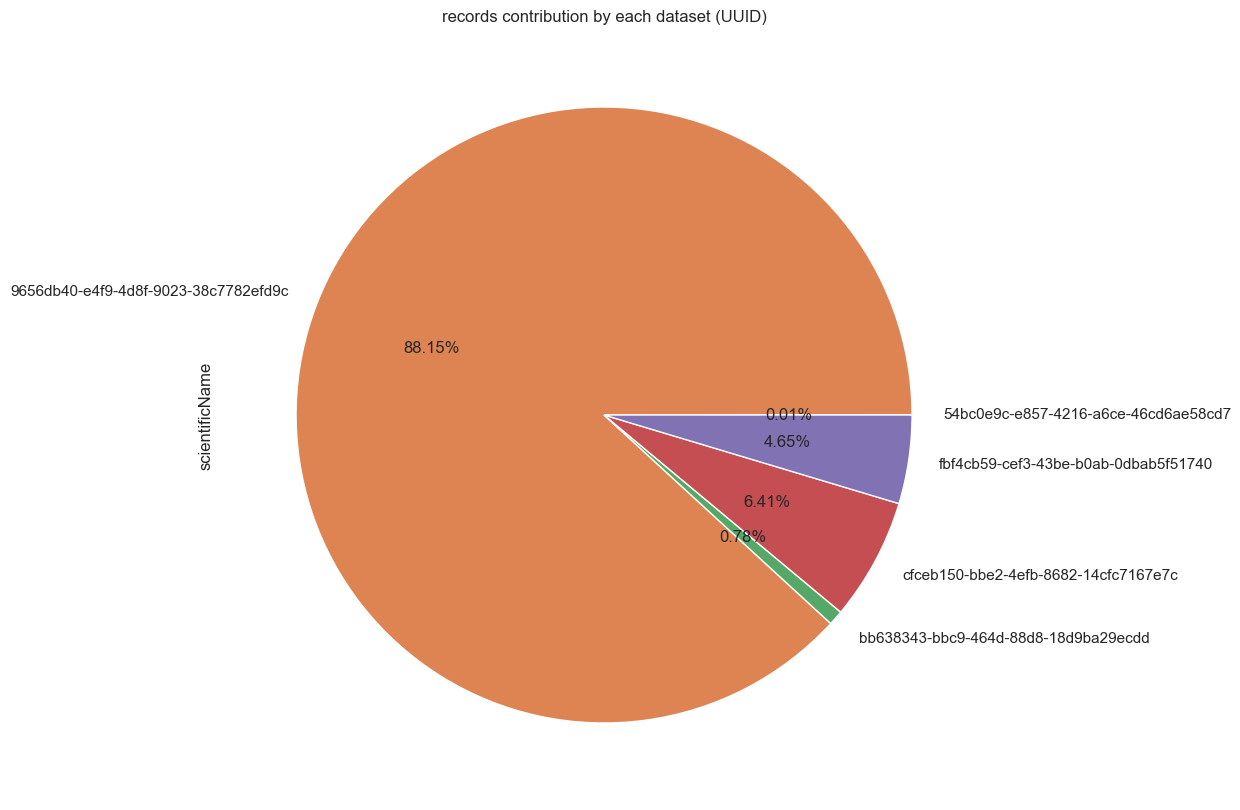

In [6]:
data.groupby("dataset_id").scientificName.count().plot.pie(autopct="%1.2f%%")
plt.title("records contribution by each dataset (UUID)");

We can see that most of the data we have got for this species has been taken from one single source that accounts for nearly 89% of the total number of records. Therefore, the findings in this analysis might or might not be the complete picture.

So getting started, let us first see what kinds of measurements do we have.

In [7]:
data["measurementType"].unique()

array(['Individual Density', 'visibility', 'cover', 'relief', 'substrate',
       'Coverage (in assayed sample) of biological entity specified elsewhere of the bed',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'temperature', 'salinity'], dtype=object)

### 1. individual density v/s years

Let us first visualize how `individual density` is spread across years. For this we need to get the `year` first from the `eventDate`.

In [11]:
# this pick up the year from the eventDate by slicing
data["nYear"] = data["eventDate"].str[:4].astype(int)

In [12]:
sns.set(style='darkgrid', rc={'figure.figsize':(12,8)})

C:\Users\dolap\AppData\Local\Temp\ipykernel_30684\1510868198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ind_dens["measurementValue"] = _ind_dens.measurementValue.astype(float)
C:\Users\dolap\AppData\Local\Temp\ipykernel_30684\1510868198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ind_dens.sort_values(by="eventDate", inplace=True)


Text(0, 0.5, 'mean density')

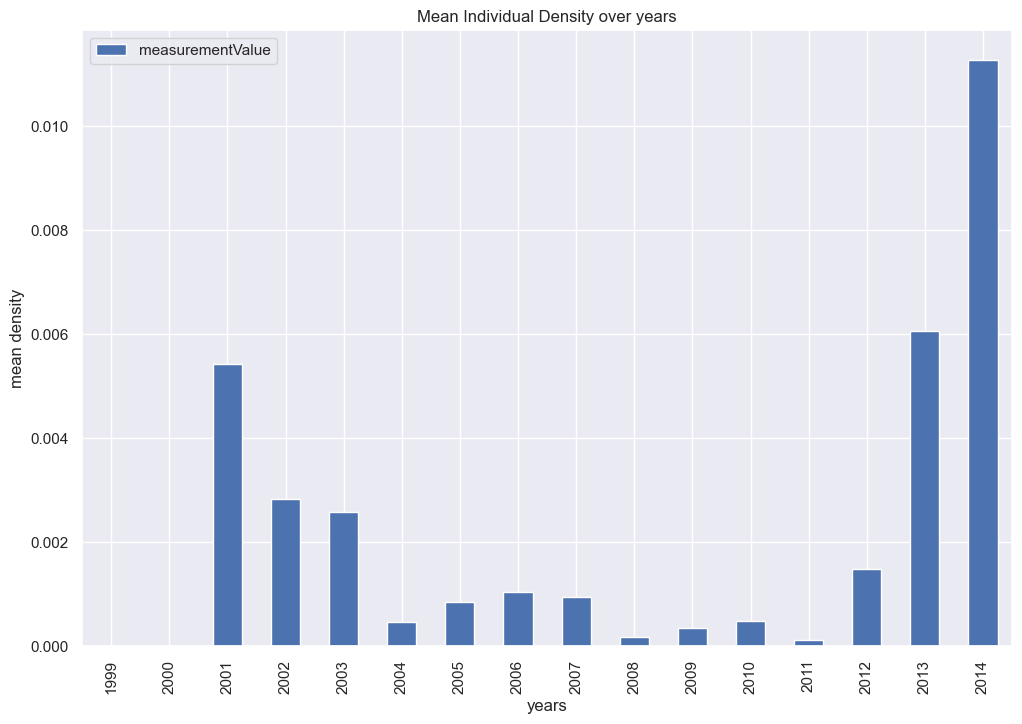

In [14]:
_ind_dens = data[data["measurementType"]=="Individual Density"]
_ind_dens["measurementValue"] = _ind_dens.measurementValue.astype(float)
_ind_dens.sort_values(by="eventDate", inplace=True)
_ind_dens[["measurementValue","nYear"]].groupby("nYear").mean().plot.bar()
plt.title("Mean Individual Density over years")
plt.xlabel("years")
plt.ylabel("mean density")

From this plot we can see that 
+ the mean individual density over years reduced  significantly starting from 2001 untill it rebounded but to a lesser extent. This is interesting There might have been some efforts to save these kelps after their steep decline that lead to its rejuvenation. 
+ However, more recent records are missing.

Now let us get back to where we started, we'll look again at the measurement types we have.

In [15]:
data["measurementType"].unique()

array(['Individual Density', 'visibility', 'cover', 'relief', 'substrate',
       'Coverage (in assayed sample) of biological entity specified elsewhere of the bed',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'temperature', 'salinity'], dtype=object)

### 2. Analysing `cover` values

We are going to analyse `cover` values for this we'll do some hard work. We will see what we did later.

In [16]:
_cov_data = data[data["measurementType"]=='cover']

In [17]:
l=[]
for i in _cov_data["measurementValue"]:
  l.append({x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in i.split('|')})

In [18]:
_new_cov = pd.DataFrame(l)

What we did in the previous 4 blocks of code can be summarised as:
+ we got all data which had `cover` as `measurementType`
+ we then saw that the `measurementValue` was a string with percentage composition seprated by `"|"`
+ so we sperated all these values and converted into a dictionary containing keys as the parameter and the percentage value of the parameter as the key-value.
+ we did this for every record and converted it into a kind of JSON data
+ from this JSON data we made a pandas dataframe

In [19]:
_new_cov

,seagrasses,crustose coralline,articulated coralline,red seaweed,none,other brown seaweed,mobile invertebrates,sessile invertebrates,encrusting red,brown seaweed,green seaweed
0,10.0,3.3,3.3,6.7,56.7,20.0,NaN,NaN,NaN,NaN,NaN
1,NaN,16.7,13.3,23.3,20.0,10.0,6.7,3.3,3.3,3.3,NaN
2,NaN,6.7,3.3,16.7,53.3,6.7,NaN,13.3,NaN,NaN,NaN
3,NaN,13.3,10.0,40.0,13.3,10.0,6.7,NaN,NaN,6.7,NaN
4,NaN,NaN,23.3,16.7,NaN,6.7,NaN,6.7,23.3,6.7,16.7
...,...,...,...,...,...,...,...,...,...,...,...
529,NaN,20.0,20.0,20.0,10.0,20.0,NaN,NaN,3.3,6.7,NaN
530,NaN,23.3,23.3,20.0,6.7,3.3,NaN,10.0,13.3,NaN,NaN
531,NaN,23.3,20.0,10.0,40.0,NaN,NaN,3.3,3.3,NaN,NaN
532,NaN,26.7,NaN,36.7,30.0,NaN,NaN,NaN,NaN,6.7,NaN


In [20]:
_new_cov.describe().T

,count,unique,top,freq
seagrasses,20,3,10.0,9
crustose coralline,470,13,6.7,74
articulated coralline,459,14,13.3,76
red seaweed,511,17,20.0,62
none,481,18,20.0,92
other brown seaweed,399,15,3.3,94
mobile invertebrates,107,4,3.3,85
sessile invertebrates,273,9,3.3,93
encrusting red,263,9,3.3,113
brown seaweed,300,9,3.3,105


Something interesting we can find from this data is that `red seaweed` was present in the most number of records, closely followed by `crustose coralline` and `articulated coralline`.

> Now let us clean our data to draw a pie chart of average composition for a cover record

In [21]:
# we will fit in the mean values of parameters in the last row of the dataframe
_new_cov.loc[578] = _new_cov.astype(float).mean()

In [22]:
# we will now scale every column's mean to fit in between 100 to draw a pie chart
sum = _new_cov.loc[578].sum()
for i in _new_cov.columns:
  _new_cov.loc[578,i]=_new_cov.loc[578,i]/sum*100

In [23]:
_new_cov.loc[578] # the mean value of each column

seagrasses                9.817472
crustose coralline       10.935423
articulated coralline    12.562532
red seaweed              15.636449
none                     15.167182
other brown seaweed       9.726466
mobile invertebrates      2.860341
sessile invertebrates     6.272252
encrusting red            5.350333
brown seaweed             6.306536
green seaweed             5.365013
Name: 578, dtype: object

This looks good now. Let us draw a pie chart then.

C:\Users\dolap\AppData\Local\Temp\ipykernel_30684\3118144153.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _new_cov.loc[578].plot.pie(title="Mean Composition of cover records", autopct="%2.2f%%", explode=[0.03]*len(_new_cov.columns));


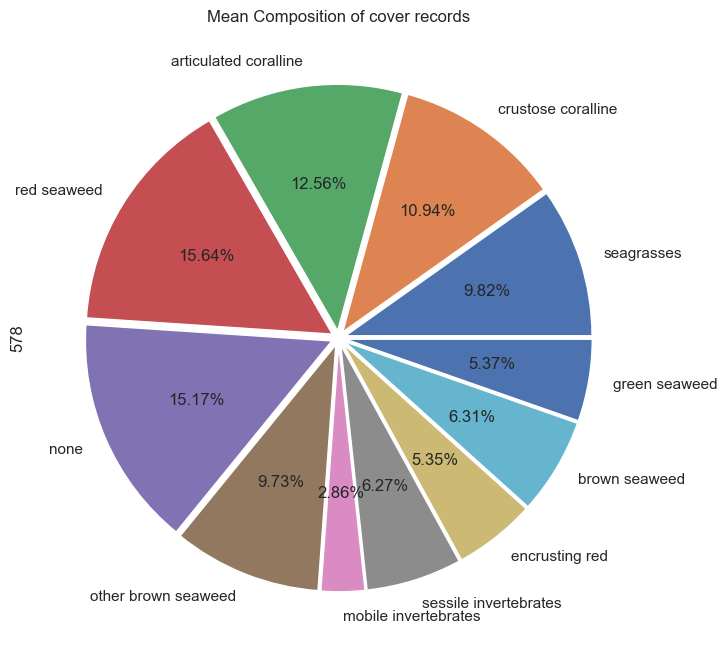

In [26]:
_new_cov.loc[578].plot.pie(title="Mean Composition of cover records", autopct="%2.2f%%", explode=[0.03]*len(_new_cov.columns));

We can see that most of the records had `red seaweed` as the `cover` with 15.32%, closely followed by `none` or no cover with 14.81%.

Now let us once again look at the unique parameter values we have.

In [27]:
data["measurementType"].unique()

array(['Individual Density', 'visibility', 'cover', 'relief', 'substrate',
       'Coverage (in assayed sample) of biological entity specified elsewhere of the bed',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'temperature', 'salinity'], dtype=object)

### 3.  `relief` records composition analysis

Now let us analyse the composition of `relief` records.

In [28]:
data[data["measurementType"]=="relief"]["measurementValue"]

35                        100.0% > 10cm - 1m
265        3.3% 0 - 10cm | 96.7% > 10cm - 1m
411        96.7% > 10cm - 1m | 3.3% 0 - 10cm
426                       100.0% > 10cm - 1m
476      10.0% > 1m - 2m | 90.0% > 10cm - 1m
                        ...                 
33655                     100.0% > 10cm - 1m
33681                     100.0% > 10cm - 1m
33703      93.3% > 10cm - 1m | 6.7% 0 - 10cm
33764                     100.0% > 10cm - 1m
33828      3.3% 0 - 10cm | 96.7% > 10cm - 1m
Name: measurementValue, Length: 534, dtype: object

We can see that the `relief` values have a percentage value for a particular length range.

Now we will analyse `relief` as we did for `cover` but in a different manner.

In [ ]:
_rel_data = data[data["measurementType"]=="relief"]
_rel_data.sort_values(by="eventDate", inplace=True)

C:\Users\dolap\AppData\Local\Temp\ipykernel_30684\2457212893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _rel_data.sort_values(by="eventDate", inplace=True);


In [34]:
# let us first create an empty dataframe, we will dress up our organised data there
rows = []

# since each relief record is a string with data values seperated by "|" we will organise data into our newly created dataframe
for i in _rel_data["measurementValue"]:
    row = {}
    for x in i.split("|"):
        parts = x.strip().split("%")
        if len(parts) == 2:
            value, key = parts[0].strip(), parts[1].strip()
            row[key] = value
    rows.append(row)

_rel_df = pd.DataFrame(rows)

In [35]:
# let us look at the organised data
_rel_df

,> 10cm - 1m,0 - 10cm,> 1m - 2m,> 2m,> 10c - 1
0,83.3,16.7,NaN,NaN,NaN
1,76.7,23.3,NaN,NaN,NaN
2,76.7,23.3,NaN,NaN,NaN
3,100.0,NaN,NaN,NaN,NaN
4,86.7,NaN,13.3,NaN,NaN
...,...,...,...,...,...
529,96.7,NaN,3.3,NaN,NaN
530,96.7,NaN,3.3,NaN,NaN
531,96.7,NaN,3.3,NaN,NaN
532,96.7,NaN,3.3,NaN,NaN


We have got some NaNs in the data, but NaNs here mean that the particular `relief` was not applicable for this record. Therefore, NaNs value are present when the particular `relief` was absent => 0.0%. We will need to replace NaNs with 0.0%.

In [36]:
_rel_df.fillna(0.0, inplace=True)

In [37]:
_rel_df

,> 10cm - 1m,0 - 10cm,> 1m - 2m,> 2m,> 10c - 1
0,83.3,16.7,0.0,0.0,0.0
1,76.7,23.3,0.0,0.0,0.0
2,76.7,23.3,0.0,0.0,0.0
3,100.0,0.0,0.0,0.0,0.0
4,86.7,0.0,13.3,0.0,0.0
...,...,...,...,...,...
529,96.7,0.0,3.3,0.0,0.0
530,96.7,0.0,3.3,0.0,0.0
531,96.7,0.0,3.3,0.0,0.0
532,96.7,0.0,3.3,0.0,0.0


Looks good! Now let us plot an `areaplot` from this data.

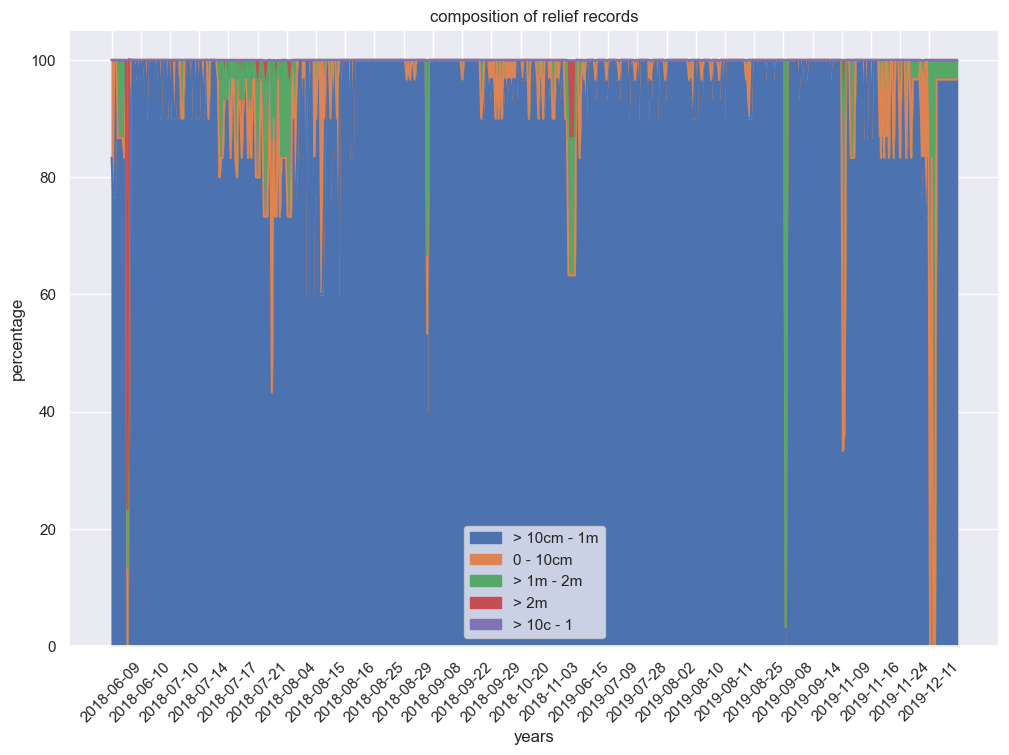

In [38]:
_rel_df = _rel_df.astype(float)
ax = _rel_df.plot.area()
plt.xlabel("years")
plt.ylabel("percentage")
plt.xticks(np.arange(0,len(_rel_data["eventDate"]), len(_rel_data["eventDate"])/len(_rel_data["eventDate"].unique())),_rel_data["eventDate"].unique(), rotation=45)
plt.title("composition of relief records");

From this plot, we can conclude that:
+ almost all observations have `> 10cm - 1m` length in the most proportion.
+ initially around July-early Aug 2018 records of length `> 1m - 2m` and `0 - 10cm` did exist but have since either declined or appeared not often.
+ we see an unexpected peak for `> 1m - 2m` around early december 2019, which might be record-specific spike.

### 4. `substrate` composition in records

Substrate is the material that rests at the bottom of a stream. Stream substrate can affect the life found within the stream habitat. We will first visualize the `substrate` records as we did for `relief` and then bring out a very interesting plot.

In [39]:
data[data["measurementType"]=="substrate"]["measurementValue"]

36                              70.0% sand | 30.0% bedrock
266      90.0% bedrock | 3.3% boulder | 3.3% cobble | 3...
412      13.3% boulder | 3.3% cobble | 33.3% sand | 50....
427      26.7% boulder | 20.0% cobble | 10.0% sand | 43...
477      3.3% boulder | 10.0% cobble | 3.3% sand | 83.3...
                               ...                        
33656                         16.7% cobble | 83.3% bedrock
33682    63.3% bedrock | 13.3% boulder | 16.7% cobble |...
33704    10.0% boulder | 16.7% cobble | 30.0% sand | 43...
33765    43.3% bedrock | 26.7% boulder | 6.7% cobble | ...
33829    6.7% boulder | 3.3% cobble | 13.3% sand | 76.7...
Name: measurementValue, Length: 534, dtype: object

In [40]:
_sub_data = data[data["measurementType"]=="substrate"]
_sub_data = _sub_data.sort_values(by="eventDate")

In [42]:
# let us first create an empty dataframe, we will dress up our organised data there
rows = []

# since each substrate record is a string with data values seperated by "|" we will organise data into our newly created dataframe
for i in _sub_data["measurementValue"]:
    row = {}
    for x in i.split("|"):
        parts = x.strip().split("%")
        if len(parts) == 2:
            value, key = parts[0].strip(), parts[1].strip()
            row[key] = value
    rows.append(row)

_sub_df = pd.DataFrame(rows)

In [43]:
_sub_df

,cobble,bedrock,sand,boulder,other
0,10.0,90.0,NaN,NaN,NaN
1,NaN,70.0,30.0,NaN,NaN
2,NaN,70.0,30.0,NaN,NaN
3,NaN,70.0,10.0,20.0,NaN
4,13.3,76.7,3.3,6.7,NaN
...,...,...,...,...,...
529,36.7,36.7,NaN,26.7,NaN
530,36.7,36.7,NaN,26.7,NaN
531,36.7,36.7,NaN,26.7,NaN
532,36.7,36.7,NaN,26.7,NaN


Note that we have got so many NaNs. NaNs mean that the particular kind of substrate is missing so essentially it is 0.0%. So, we will replace all NaNs with 0.0.

In [44]:
_sub_df.fillna(0.0, inplace=True)

Now let us again draw an area plot.

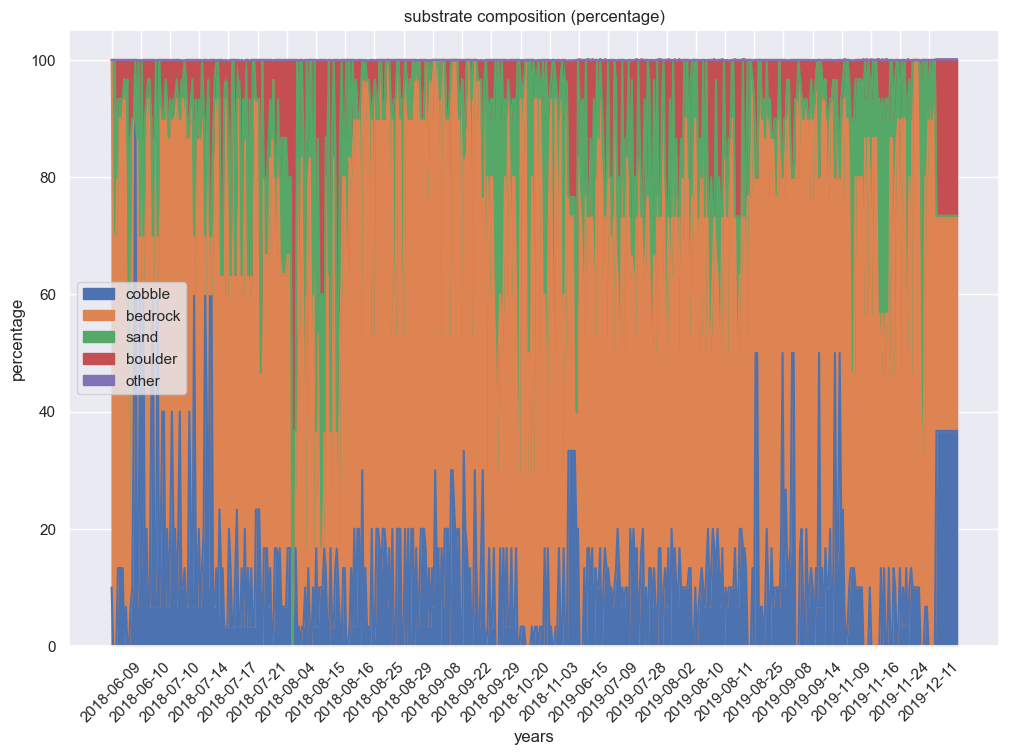

In [45]:
_sub_df = _sub_df.astype(float)
_sub_df.plot.area()
plt.xlabel("years")
plt.ylabel("percentage")
plt.xticks(np.arange(0,len(_sub_data["eventDate"]), len(_sub_data["eventDate"])/len(_sub_data["eventDate"].unique())),_sub_data["eventDate"].unique(), rotation=45)
plt.title("substrate composition (percentage)");

There is a significant amount of variance in this distribution.

From this plot we can see that most of the substrate is composed of bedrock but
+ the proportion of cobble over time has remained almost constant. Wherever there has been lesser proportion, it has been offset by the occasional spikes.
+ proportion of bedrock, even though the highest, is not fixed and oscillates a lot.
+ it will be difficult to say whether the mean percetage of boulder has decreased over time due to a high variance.

Since substrate composition is quite varied, it will be a nice idea to plot a relation between `cover` and `substrate` since substrate strongly affects the aquatic life.

### 5. Does `substrate` affect `cover`?

We will do some work around for this particular analysis and later plot a correlation heatmap.

In [46]:
_si_data = data[data["measurementType"]=="substrate"]

In [48]:
# Build the dataframe

rows = []

for _, row in _si_data.iterrows():
    record_id = row["id"]
    main_dict = {}

    # First: parse the substrate string
    try:
        main_dict.update({
            x.strip().split("%")[1].strip(): x.strip().split("%")[0].strip()
            for x in row["measurementValue"].split("|")
            if "%" in x
        })
    except Exception as e:
        print(f"Error parsing substrate for ID {record_id}: {e}")

    # Second: find the corresponding cover entry (if it exists)
    match = data[(data["id"] == record_id) & (data["measurementType"] == "cover")]
    if not match.empty:
        try:
            cover_string = match.iloc[0]["measurementValue"]
            main_dict.update({
                x.strip().split("%")[1].strip(): x.strip().split("%")[0].strip()
                for x in cover_string.split("|")
                if "%" in x
            })
        except Exception as e:
            print(f"Error parsing cover for ID {record_id}: {e}")

    rows.append(main_dict)

_si_df = pd.DataFrame(rows)


In [49]:
# now we will replace all NaNs with 0% and cast every value to float type
_si_df.fillna(0.0, inplace=True)
_si_df = _si_df.astype(float)
_si_df

,sand,bedrock,seagrasses,crustose coralline,articulated coralline,red seaweed,none,other brown seaweed,boulder,cobble,mobile invertebrates,sessile invertebrates,encrusting red,brown seaweed,green seaweed,other
0,70.0,30.0,10.0,3.3,3.3,6.7,56.7,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.3,90.0,0.0,16.7,13.3,23.3,20.0,10.0,3.3,3.3,6.7,3.3,3.3,3.3,0.0,0.0
2,33.3,50.0,0.0,6.7,3.3,16.7,53.3,6.7,13.3,3.3,0.0,13.3,0.0,0.0,0.0,0.0
3,10.0,43.3,0.0,13.3,10.0,40.0,13.3,10.0,26.7,20.0,6.7,0.0,0.0,6.7,0.0,0.0
4,3.3,83.3,0.0,0.0,23.3,16.7,0.0,6.7,3.3,10.0,0.0,6.7,23.3,6.7,16.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.0,83.3,0.0,20.0,20.0,20.0,10.0,20.0,0.0,16.7,0.0,0.0,3.3,6.7,0.0,0.0
530,6.7,63.3,0.0,23.3,23.3,20.0,6.7,3.3,13.3,16.7,0.0,10.0,13.3,0.0,0.0,0.0
531,30.0,43.3,0.0,23.3,20.0,10.0,40.0,0.0,10.0,16.7,0.0,3.3,3.3,0.0,0.0,0.0
532,23.3,43.3,0.0,26.7,0.0,36.7,30.0,0.0,26.7,6.7,0.0,0.0,0.0,6.7,0.0,0.0


Now this looks good. We have done most of the hardwork and the time has come to do the most interesting part of this analysis. Fasten your seatbelts!

We are going to plot a correlation plot between `substrate` parameters and `cover` values to check whether `substrate` indeed affects `cover` or not.

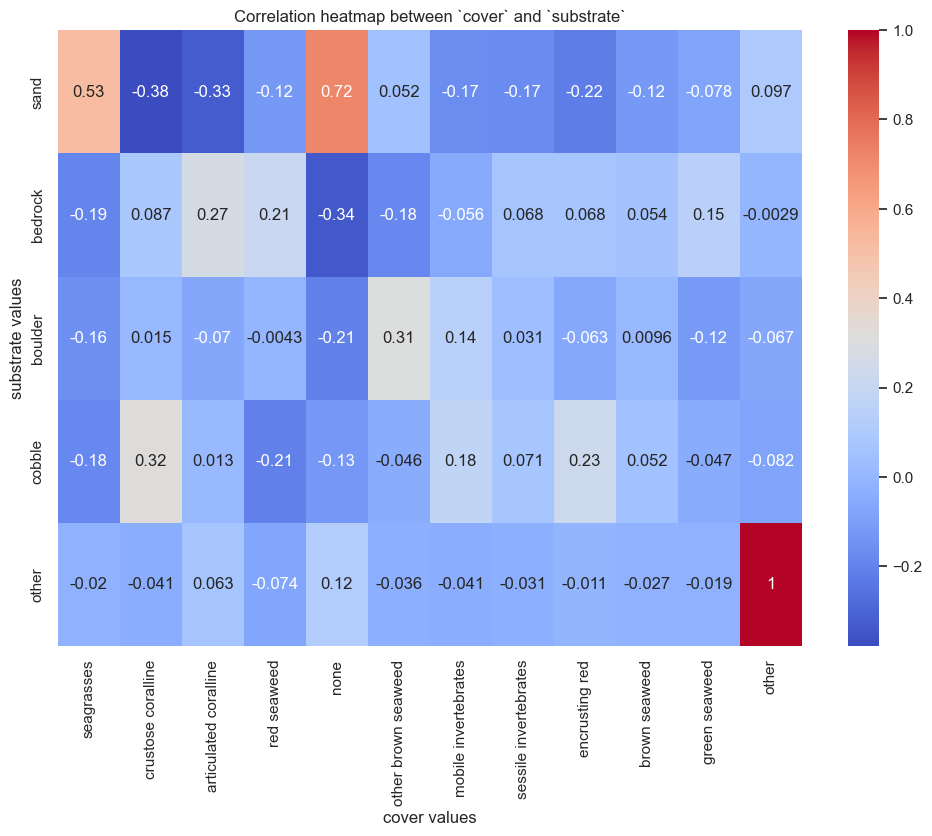

In [56]:
# let's get the correlation matrix first
corr = _si_df.corr()

# now we will drop the repeated columns from both axis
corr.drop(["other brown seaweed", "crustose coralline","articulated coralline","brown seaweed","encrusting red","red seaweed","sessile invertebrates","mobile invertebrates","green seaweed","seagrasses","none"], axis=0, inplace=True)
corr.drop(["bedrock","cobble","sand","boulder"], axis=1, inplace=True)

# now let us draw the correlation heatmap
# Plot with custom colormap
sns.heatmap(
    corr,
    cmap="coolwarm",  
    annot=True,     
    linecolor='white'
)
plt.title("Correlation heatmap between `cover` and `substrate`")
plt.xlabel('cover values')
plt.ylabel('substrate values');

From this correlation plot we can make out that:
+ `sand` substrate and `none` cover are highly correlated, no cover was mostly found when `sand` substrate was significant
+ `bedrock` substrate and `other brown seaweed` are highly negatively correlated, which means when `bedrock` was signficant `other brown seaweed` was hardly found.
+ similarly, `sand` and `crustose coralline` are also significantly negatively correlated.